In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score



In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/nlp'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['cnn_model.h5', 'hybrid_cnn_model.h5', 'readme_nlp.rtf', 'train.csv', 'test.csv', 'hybrid_hyper_cnn_model.h5', 'nlp_finalcoursework.ipynb', 'Model_testing.ipynb']


In [ ]:
#importing the train and test datasets
test_df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH,'test.csv'))
train_df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH,'train.csv'))

In [ ]:
#uncomment the below lines if you are running the code in jupyter nortebook and comment the above cell
#test_df=pd.read_csv('test.csv')
#train_df=pd.read_csv('train.csv')

In [ ]:
#displaying 10 sample rows from test dataframe
test_df.sample(10)

,text,emotions
766,feel fond though feel like amalgamation many p...,2
669,gent feeling lousy last week ended trip hospit...,0
810,decided lay bed started feel really violent li...,3
1578,ive feeling listless lately,0
1446,im tired feeling unhappy thing unmotivated,0
1077,feel talented anything eventually putting fully,1
1059,careful make sure character featured feel symp...,2
544,feel bit dull,0
903,feel like acceptable,1
1335,feel defeated,0


In [ ]:
#eliminating the null values from the test dataframe if present
test_df.isna().sum()

text        0
emotions    0
dtype: int64

In [ ]:
#splitting the test and train dataframe into features (X) and labels (y)
X_test = test_df['text']
y_test = test_df['emotions']

X_train = train_df['text']
y_train = train_df['emotions']

In [ ]:
#converting the features of test and train into numpy arrays
X_test = np.array(X_test)
X_train = np.array(X_train)

In [ ]:
#printing the shape of features and labels of test dataset
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_test shape:  (2000,)
y_test shape:  (2000,)


In [ ]:
#tokenizer with 5000 maximum number of words is fit on the training data to convert the X_test into a
#sequence of integers representing the words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
#max sequence length is hard coded as 100
max_sequence_length = 100

In [ ]:
#adding the sequence to the text data with max_sequence_length to ensure that X_test have the same length
#as required by cnn
X_test = pad_sequences(X_test, maxlen=max_sequence_length)
#converting y_test into one hot encoded binary values
y_test = to_categorical(y_test)


CNN model testing

In [ ]:
#loading the saved baseline cnn model for testing
cnn_model = load_model('/content/drive/MyDrive/Colab Notebooks/nlp/cnn_model.h5')

In [ ]:
##uncomment the below lines if you are running the code in jupyter nortebook and comment the above cell
#cnn_model=load_model('cnn_model.h5')

In [ ]:
#evaluating the baseline cnn model against test set
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

63/63 [==============================] - 1s 9ms/step - loss: 1.4264 - accuracy: 0.6590
Test Loss: 1.4264497756958008
Test Accuracy: 0.6589999794960022


In [ ]:
#predicting the results
y_pred = cnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

63/63 [==============================] - 1s 12ms/step


In [ ]:
#printing the classification report for the baseline cnn model
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.56      0.82      0.66       581
           1       0.81      0.66      0.73       695
           2       0.57      0.43      0.49       159
           3       0.75      0.59      0.66       275
           4       0.67      0.56      0.61       224
           5       0.51      0.39      0.44        66

    accuracy                           0.66      2000
   macro avg       0.64      0.58      0.60      2000
weighted avg       0.68      0.66      0.66      2000



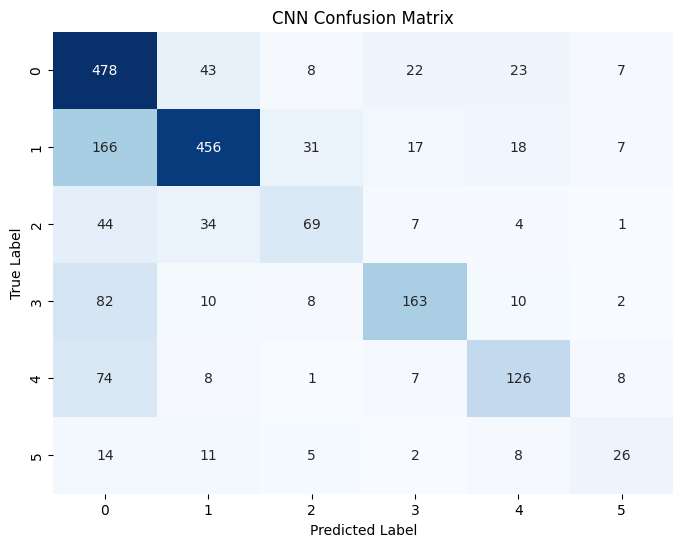

In [ ]:
#plotting the confusion matrix
y_test_np = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_np, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

CNN biDirectional LSTM model testing

In [ ]:
#loading the cnn biDirectional LSTM model
cnn_hybrid_model = load_model('/content/drive/MyDrive/Colab Notebooks/nlp/hybrid_cnn_model.h5')

In [ ]:
##uncomment the below lines if you are running the code in jupyter nortebook and comment the above cell
#cnn_hybrid_model=load_model('hybrid_cnn_model.h5')

In [ ]:
#printing the test loss and accuracy of the model
loss, accuracy = cnn_hybrid_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

63/63 [==============================] - 5s 58ms/step - loss: 0.3333 - accuracy: 0.9095
Test Loss: 0.33334898948669434
Test Accuracy: 0.909500002861023


In [ ]:
#predicting the results
y_pred_hybrid = cnn_hybrid_model.predict(X_test)
y_pred_hybrid_classes = y_pred_hybrid.argmax(axis=-1)
y_test_hybrid_classes = y_test.argmax(axis=-1)

63/63 [==============================] - 7s 93ms/step


In [ ]:
#printing the classification report for cnn biDirectional LSTM model
print(classification_report(y_test_hybrid_classes, y_pred_hybrid_classes))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       581
           1       0.94      0.92      0.93       695
           2       0.73      0.83      0.78       159
           3       0.93      0.91      0.92       275
           4       0.89      0.87      0.88       224
           5       0.70      0.74      0.72        66

    accuracy                           0.91      2000
   macro avg       0.86      0.87      0.86      2000
weighted avg       0.91      0.91      0.91      2000



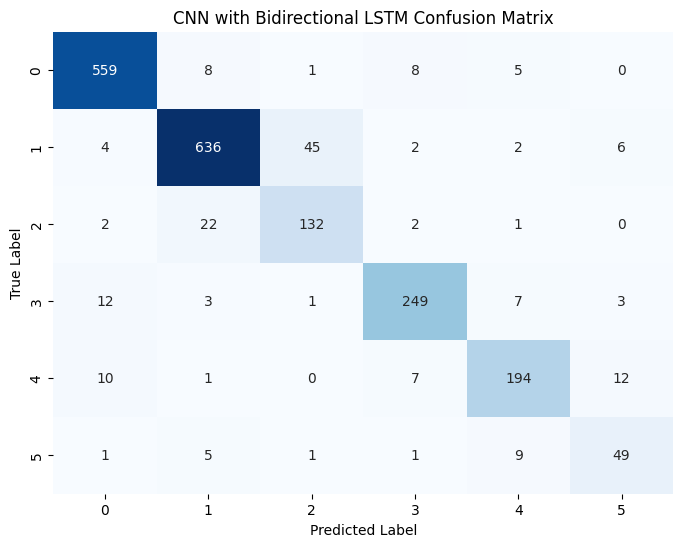

In [ ]:
#printing the confusion matrix
y_test_np = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_np, y_pred_hybrid_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN with Bidirectional LSTM Confusion Matrix')
plt.show()

Hyper parameter optimized Bidirectional LSTM model

In [ ]:
#loading hyperparameterized BiDirectional LSTM model
cnn_hybrid_tune_model = load_model('/content/drive/MyDrive/Colab Notebooks/nlp/hybrid_hyper_cnn_model.h5')

In [ ]:
##uncomment the below lines if you are running the code in jupyter nortebook and comment the above cell
#cnn_hybrid_tune_model=load_model('hybrid_hyper_cnn_model.h5')

In [ ]:
#printing the loss and accuracy of the model
loss, accuracy = cnn_hybrid_tune_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

63/63 [==============================] - 4s 43ms/step - loss: 0.4094 - accuracy: 0.8695
Test Loss: 0.4094454348087311
Test Accuracy: 0.8694999814033508


In [ ]:
#predicting the results
y_pred_hyper = cnn_hybrid_tune_model.predict(X_test)
y_pred_hyper_classes = y_pred_hyper.argmax(axis=-1)
y_test_hyper_classes = y_test.argmax(axis=-1)

63/63 [==============================] - 3s 40ms/step


In [ ]:
#print the classification report
print(classification_report(y_test_hyper_classes, y_pred_hyper_classes))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       581
           1       0.91      0.92      0.91       695
           2       0.70      0.69      0.69       159
           3       0.81      0.89      0.85       275
           4       0.85      0.78      0.82       224
           5       0.64      0.55      0.59        66

    accuracy                           0.87      2000
   macro avg       0.81      0.79      0.80      2000
weighted avg       0.87      0.87      0.87      2000



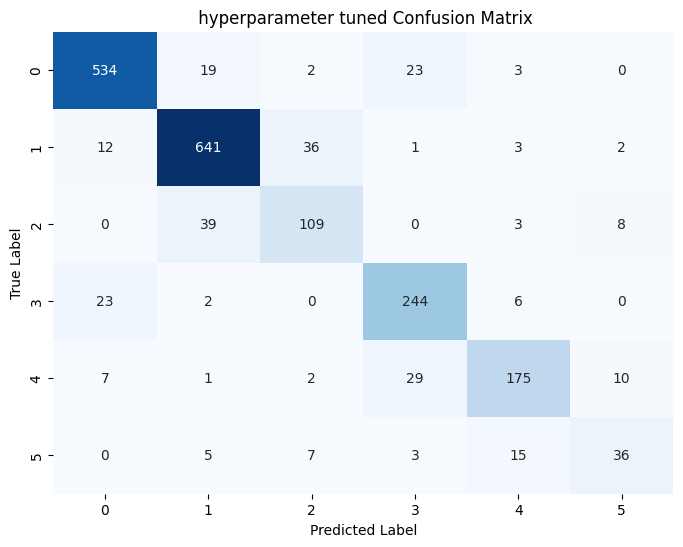

In [ ]:
#printing the confusion matrix
y_test_np = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_np, y_pred_hyper_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(' hyperparameter tuned Confusion Matrix')
plt.show()